In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class Machines:
    def __init__(self, k):
        self.k = k
        self.means = (np.random.random(size=k) * 10) - 4

    def reward(self, action):
        return np.random.normal(loc = self.means[action])

In [ ]:
env = Machines(5)

In [ ]:
env.reward(4)

1.49317349834142

In [ ]:
def random_agent(env, steps):
    """
    Agent that takes random actions.
    """
    reward_hist = []
    action_hist = []

    for _ in range(steps):
        act = np.random.randint(0, env.k)
        rew = env.reward(act)

        reward_hist.append(rew)
        action_hist.append(act)

    return reward_hist, action_hist

In [ ]:
rewards, actions = random_agent(env, 1000)
np.average(rewards)

np.float64(1.4626991551214772)

## Simple Bandit

In [ ]:
def rand_argmax(arr):
    """
    Randomly select one index with max element in arr.
    """
    return np.random.choice(np.flatnonzero(arr == arr.max()))

In [ ]:
def simple_bandit(env, steps, eps=0):
    """
    Bandit following simple epsilon-greedy algorithm, with dynamic step size.
    """
    Q = np.zeros(env.k) # average
    N = np.zeros(env.k) # numbers

    reward_hist = []
    action_hist = []

    for _ in range(steps):
        act = rand_argmax(Q) if np.random.random() > eps else np.random.randint(0, env.k)
        rew = env.reward(act)
        # print(act, ":", rew)

        N[act] += 1
        Q[act] += 1/N[act] * (rew - Q[act])

        reward_hist.append(rew)
        action_hist.append(act)

    return Q, np.array(reward_hist), np.array(action_hist)

In [ ]:
Q, rewards, actions = simple_bandit(env, 1000)
np.average(rewards), Q

(np.float64(4.0698966644471),
 array([0.        , 0.        , 4.06989666, 0.        , 0.        ]))

In [ ]:
e_Q, e_rewards, e_actions = simple_bandit(env, 1000, 0.1)
np.average(e_rewards), e_Q

(np.float64(3.822867584593455),
 array([ 2.70198646,  3.30377958,  4.1031757 , -2.24464644, -0.2667237 ]))

In [ ]:
env = Machines(10)

eps0_rewards, eps0_acts = [], []
eps01_rewards, eps01_acts = [], []


for _ in range(100):
    _, rew, acts = simple_bandit(env, 1000)
    eps0_rewards.append(rew)
    eps0_acts.append(acts)

    _, rew, acts = simple_bandit(env, 1000, eps=0.1)
    eps01_rewards.append(rew)
    eps01_acts.append(acts)


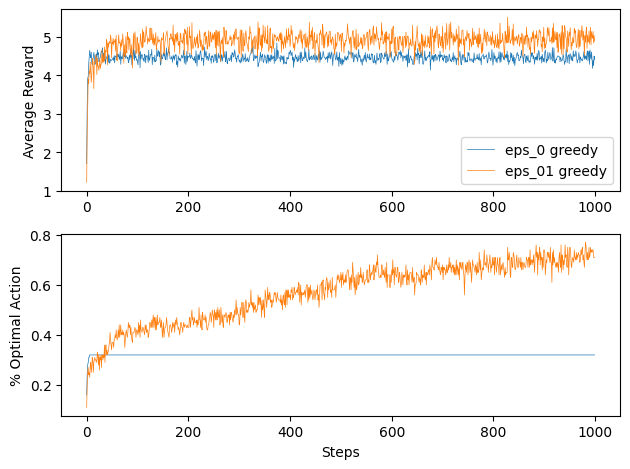

In [ ]:
# plt.figure(figsize=(10, 6))
fig = plt.figure()
ax = fig.add_subplot(211)
ax.plot(np.average(eps0_rewards, axis=0), linewidth=0.5, label="eps_0 greedy")
ax.plot(np.average(eps01_rewards, axis=0), linewidth=0.5, label="eps_01 greedy")
ax.set_ylabel('Average Reward')
# plt.plot(rew)
ax.legend()


# percentage of optimal actions
ax = fig.add_subplot(212)
max_A = np.argmax(env.means)
ax.plot(np.average(eps0_acts==max_A, axis=0), linewidth=0.5, label="eps_0 greedy")
ax.plot(np.average(eps01_acts==max_A, axis=0), linewidth=0.5, label="eps_01 greedy")
ax.set_ylabel('% Optimal Action')
ax.set_xlabel('Steps')

plt.tight_layout()
plt.show()

In [ ]:
# esp0_Q, _, _ = simple_bandit(env, 5000)
esp01_Q, _, _ = simple_bandit(env, 5000, eps=0.1)

print("True: ", env.means)
print("Esp01:", esp01_Q)

True:  [-1.44888865  3.25715411  5.27306329 -0.55152572  5.15859245 -2.55059856
  5.42629136 -1.92300835  1.05137684 -2.97782252]
Esp01: [-1.60806428  3.51087296  5.32864063 -0.55768092  5.29398936 -2.33376701
  5.42672438 -1.71839409  1.10483234 -3.02491383]


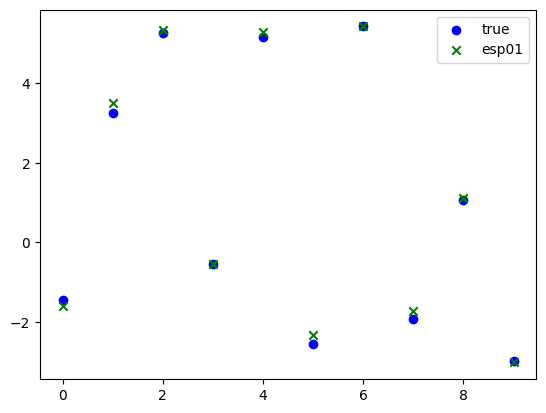

In [ ]:
plt.scatter(range(env.k), env.means, color='blue', marker='o', label='true')
# plt.scatter(range(env.k), esp0_Q, color='red', marker='x', label='esp0')
plt.scatter(range(env.k), esp01_Q, color='green', marker='x', label='esp01')
plt.legend()

### Bandit with constant Step Size

In [ ]:
def alpha_bandit(env, steps, alpha=0.1, eps=0):
    """
    Bandit following simple epsilon-greedy algorithm, with constant step size.
    """
    Q = np.zeros(env.k) # average
    N = np.zeros(env.k) # numbers

    reward_hist = []
    action_hist = []

    for _ in range(steps):
        act = rand_argmax(Q) if np.random.random() >= eps else np.random.randint(0, env.k)
        rew = env.reward(act)
        # print(act, ":", rew)

        N[act] += 1
        Q[act] += alpha * (rew - Q[act])

        reward_hist.append(rew)
        action_hist.append(act)

    return Q, np.array(reward_hist), np.array(action_hist)

In [ ]:
Q, rewards, actions = alpha_bandit(env, 1000, alpha=0.1, eps=0.1)
np.average(rewards), Q

(np.float64(4.761513736708648),
 array([-1.01232761,  1.43877418,  5.14570258, -0.58606283,  3.00594864,
        -2.33399649,  3.42603694, -1.35703999,  0.48902685, -1.44611147]))

In [ ]:
# env = Machines(10)

alpha_rewards, alpha_acts = [], []


for _ in range(100):
    _, rew, acts =  alpha_bandit(env, 1000, alpha=0.1, eps=0.1)
    alpha_rewards.append(rew)
    alpha_acts.append(acts)



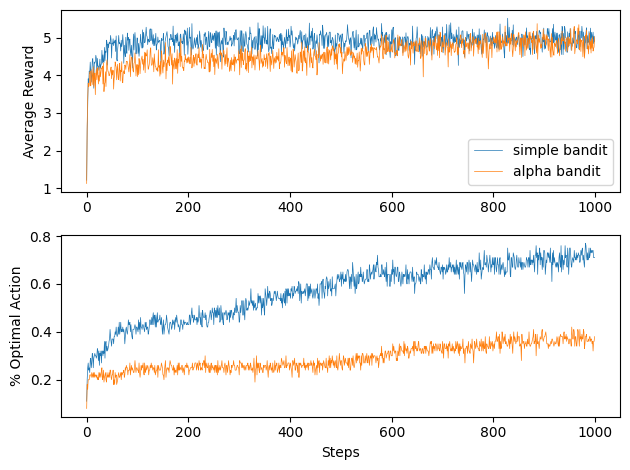

In [ ]:
# plt.figure(figsize=(10, 6))
fig = plt.figure()
ax = fig.add_subplot(211)
ax.plot(np.average(eps01_rewards, axis=0), linewidth=0.5, label="simple bandit")
ax.plot(np.average(alpha_rewards, axis=0), linewidth=0.5, label="alpha bandit")
ax.set_ylabel('Average Reward')
# plt.plot(rew)
ax.legend()


# percentage of optimal actions
ax = fig.add_subplot(212)
max_A = np.argmax(env.means)
ax.plot(np.average(eps01_acts==max_A, axis=0), linewidth=0.5, label="simple bandit")
ax.plot(np.average(alpha_acts==max_A, axis=0), linewidth=0.5, label="alpha bandit")
ax.set_ylabel('% Optimal Action')
ax.set_xlabel('Steps')

plt.tight_layout()
plt.show()

True:  [-1.44888865  3.25715411  5.27306329 -0.55152572  5.15859245 -2.55059856
  5.42629136 -1.92300835  1.05137684 -2.97782252]
Alpha: [-0.99433428  1.99784875  5.47937336 -0.35394395  2.27557491 -2.24516633
  3.29948196 -1.22658197  0.80993121 -1.93954487]


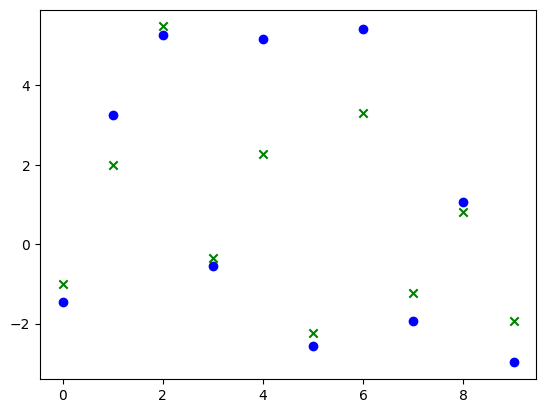

In [ ]:
# esp0_Q, _, _ = simple_bandit(env, 5000)
alpha_Q, _, _ = alpha_bandit(env, 1000, alpha=0.1, eps=0.1)

print("True: ", env.means)
print("Alpha:", alpha_Q)

plt.scatter(range(env.k), env.means, color='blue', marker='o', label='true')
plt.scatter(range(env.k), alpha_Q, color='green', marker='x', label='esp01')
plt.legend()

### UCB Bandit

In [ ]:
def ucb_bandit(env, steps, c=1):
    """
    Bandit following UCB stratergy for action selection.
    """
    Q = np.zeros(env.k) # average
    N = np.zeros(env.k) # numbers

    reward_hist = []
    action_hist = []

    for a in range(env.k):
        N[a] = 1
        Q[a] = env.reward(a)

        reward_hist.append(Q[a])
        action_hist.append(a)

    for t in range(env.k, steps):
        act = rand_argmax(Q + c * np.sqrt(np.log(t)/N))
        rew = env.reward(act)

        N[act] += 1
        Q[act] += 1/N[act] * (rew - Q[act])

        reward_hist.append(rew)
        action_hist.append(act)

    return Q, np.array(reward_hist), np.array(action_hist)

In [ ]:
# env = Machines(10)

# eps0_rewards, eps0_acts = [], []
ucb_rewards, ucb_acts = [], []


for _ in range(100):
    _, rew, acts = ucb_bandit(env, 1000, c=2)
    ucb_rewards.append(rew)
    ucb_acts.append(acts)


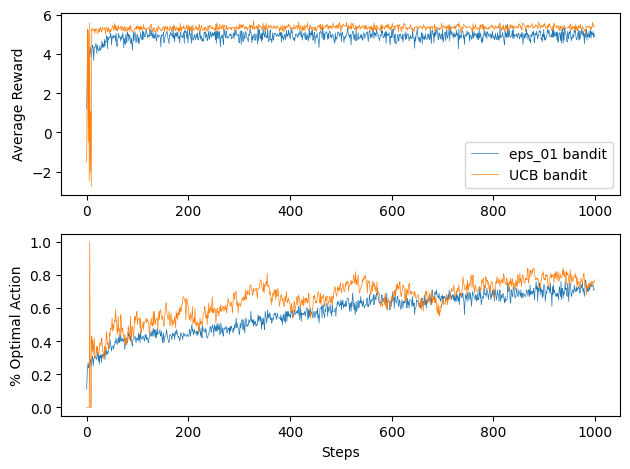

In [ ]:
# plt.figure(figsize=(10, 6))
fig = plt.figure()
ax = fig.add_subplot(211)
ax.plot(np.average(eps01_rewards, axis=0), linewidth=0.5, label="eps_01 bandit")
ax.plot(np.average(ucb_rewards, axis=0), linewidth=0.5, label="UCB bandit")
# plt.plot(rew)
ax.set_ylabel('Average Reward')
ax.legend()


# percentage of optimal actions
ax = fig.add_subplot(212)
max_A = np.argmax(env.means)
ax.plot(np.average(eps01_acts==max_A, axis=0), linewidth=0.5, label="eps_01 bandit")
ax.plot(np.average(ucb_acts==max_A, axis=0), linewidth=0.5, label="UCB bandit")
ax.set_ylabel('% Optimal Action')
ax.set_xlabel('Steps')

plt.tight_layout()
plt.show()

True:  [-1.44888865  3.25715411  5.27306329 -0.55152572  5.15859245 -2.55059856
  5.42629136 -1.92300835  1.05137684 -2.97782252]
UCB: [-2.49792196  2.99845206  5.28488897 -0.68972964  5.22549742 -2.58536727
  5.44913787 -4.12661839 -0.07949388 -2.95008845]


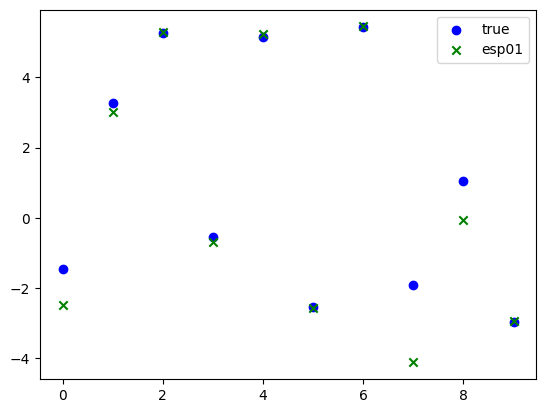

In [ ]:
ucb_Q, _, _ = ucb_bandit(env, 1000, c=3)

print("True: ", env.means)
print("UCB:", ucb_Q)

plt.scatter(range(env.k), env.means, color='blue', marker='o', label='true')
plt.scatter(range(env.k), ucb_Q, color='green', marker='x', label='esp01')
plt.legend()